In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12,6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

### 01 공분산
- 공분산은 두 컬럼의 상관 관계를 분석할 수 있는 수치이다.
- 두 컬럼의 값이 같이 증가하고 같이 감소하면 공분산 값은 0보다 크다.
- 두 컬럼의 값이 서로 반대로 증감하면 공분산 값은 0보다 작다.
- 두 컬럼의 값이 관계가 적다면 공분산 값은 0과 가깝다.

In [2]:
cov_data = pd.read_csv('data/3-5-1-cov.csv')
cov_data

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


In [3]:
# 각 데이터를 추출한다.
x = cov_data['x']
y = cov_data['y']
# 샘플 크기
n = len(cov_data)
# 표본 평균
x_bar = np.mean(x)
y_bar = np.mean(y)

In [4]:
# 공분산을 구한다.
cov = sum((x - x_bar) * (y - y_bar)) / n
cov

6.9060000000000015

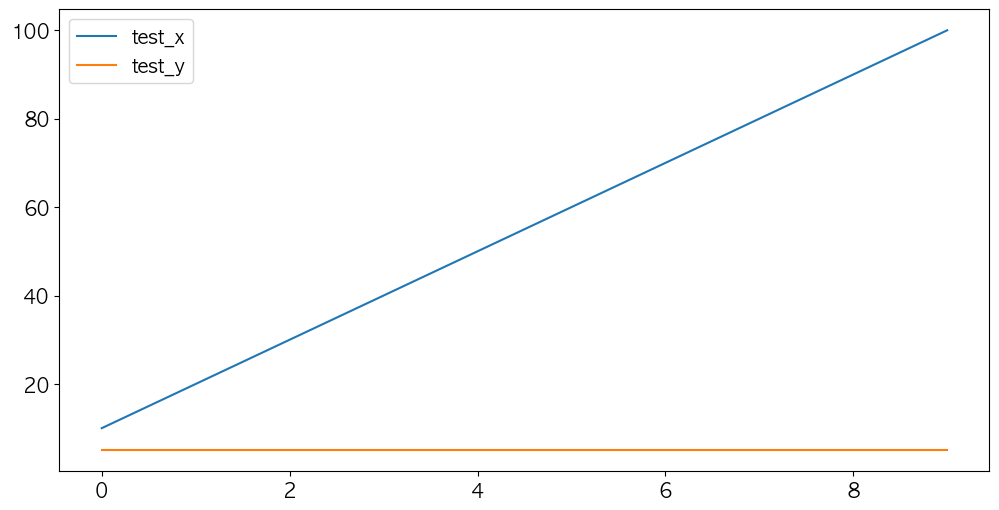

In [5]:
test_x = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
test_y = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

plt.plot(test_x, label='test_x')
plt.plot(test_y, label='test_y')
plt.legend()
plt.show()

In [6]:
n2 = len(test_x)
x_bar2 = np.mean(test_x)
y_bar2 = np.mean(test_y)

sum((test_x - x_bar2) * (test_y - y_bar2)) / n2

np.float64(0.0)

In [7]:
test_x = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
test_y = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

n2 = len(test_x)
x_bar2 = np.mean(test_x)
y_bar2 = np.mean(test_y)

sum((test_x - x_bar2) * (test_y - y_bar2)) / n2

np.float64(825.0)

In [8]:
test_x = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
test_y = [100, 90, 80, 70, 60, 50, 40, 30, 20, 10]

n2 = len(test_x)
x_bar2 = np.mean(test_x)
y_bar2 = np.mean(test_y)

sum((test_x - x_bar2) * (test_y - y_bar2)) / n2

np.float64(-825.0)

### 공분산  행렬
- 두 컬럼의 각각에 대한 분산과 두 컬럼간의 공분산 값을 가지고 있는 행렬

$\begin{pmatrix}x의 분산&xy에 대한 공분산\\xy에 대한 공분산&y의 분산\\ \end{pmatrix}$

In [9]:
# x의 표본 분산
s2_x = np.var(x, ddof=0)
# y의 표본 분산
s2_y = np.var(y, ddof=0)

# 공분산 행렬
cov_array = np.array([
    [s2_x, cov],
    [cov, s2_y]
])
cov_array

array([[ 3.2816,  6.906 ],
       [ 6.906 , 25.21  ]])

In [10]:
# numpy의 cov 함수를 통해 공분산 행렬을 가져올 수 있다.
np.cov(x, y, ddof=0)

array([[ 3.2816,  6.906 ],
       [ 6.906 , 25.21  ]])

### 03 피어슨 상관 계수
- 공분산 값을 최소를 -1로 최대를 1로 표준화한 값
- 다수의 컬럼들에 대해 서로간의 공분산 값을 구하게 되면 컬럼안에 있는 값에 상태에 따라 관계가 매우 높음에도 값이 다른 컬럼들간의 공분산 값보다 낮거나 높게 나올 수 있다
- 이에 다수의 컬럼들을 놓고 서로간의 상관 관계 값을 정량적으로 평가하기가 애매하다.
- 이에 -1 에서 1 사이로 표준화한 피어슨 상관 계수를 더 많이 사용한다.

In [11]:
# 피어슨 상관계수를 구한다.
rho = cov / np.sqrt(s2_x * s2_y)
rho

np.float64(0.7592719041137087)

In [12]:
# 상관 행렬
# 두 컬럼간의 피어슨 상관계수를 표현한 행렬
corr_array1 = np.array([
    [1, rho],
    [rho, 1]
])
corr_array1

array([[1.       , 0.7592719],
       [0.7592719, 1.       ]])

In [13]:
# numpy에서 피어슨 상관계수로 구성된 상관 행렬을 구하는 함수를 제공한다.
np.corrcoef(x, y)

array([[1.       , 0.7592719],
       [0.7592719, 1.       ]])

In [14]:
boston_df = pd.read_csv('data/boston.csv')
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.5380,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.4690,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.4690,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.4580,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.4580,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,0.05023,35.0,6.06,0,0.4379,5.706,28.4,6.6407,1,304,16.9,394.02,12.43,17.1
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83,19.4
333,0.05083,0.0,5.19,0,0.5150,6.316,38.1,6.4584,5,224,20.2,389.71,5.68,22.2
334,0.03738,0.0,5.19,0,0.5150,6.310,38.5,6.4584,5,224,20.2,389.40,6.75,20.7


In [15]:
# 피어슨 상관행렬
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.299462,0.549401,0.123177,0.774203,-0.236902,0.481123,-0.485364,0.130506,0.415813,-0.217170,-0.520311,0.402203,-0.205981
ZN,-0.299462,1.000000,-0.463570,-0.056859,-0.453712,0.319679,-0.516518,0.594815,-0.185087,-0.133069,-0.331369,0.141028,-0.376739,0.337241
INDUS,0.549401,-0.463570,1.000000,0.119541,0.668143,-0.389702,0.518014,-0.582163,-0.012430,0.456043,0.114985,-0.307444,0.507117,-0.384561
CHAS,0.123177,-0.056859,0.119541,1.000000,0.127425,0.037670,0.123638,-0.144668,0.082891,-0.031612,-0.130759,-0.051155,0.058319,0.082311
NOX,0.774203,-0.453712,0.668143,0.127425,1.000000,-0.262499,0.665856,-0.725148,0.124423,0.410856,-0.188975,-0.427907,0.485843,-0.253054
RM,-0.236902,0.319679,-0.389702,0.037670,-0.262499,1.000000,-0.180246,0.094296,0.112007,-0.224270,-0.321857,0.168031,-0.682117,0.897215
AGE,0.481123,-0.516518,0.518014,0.123638,0.665856,-0.180246,1.000000,-0.683708,0.117972,0.274129,0.060402,-0.225656,0.548434,-0.264981
DIS,-0.485364,0.594815,-0.582163,-0.144668,-0.725148,0.094296,-0.683708,1.000000,-0.056338,-0.259805,0.008814,0.234836,-0.335105,0.064065
RAD,0.130506,-0.185087,-0.012430,0.082891,0.124423,0.112007,0.117972,-0.056338,1.000000,0.262959,-0.027294,-0.056895,-0.043030,0.065398
TAX,0.415813,-0.133069,0.456043,-0.031612,0.410856,-0.224270,0.274129,-0.259805,0.262959,1.000000,0.008428,-0.271962,0.249577,-0.299662


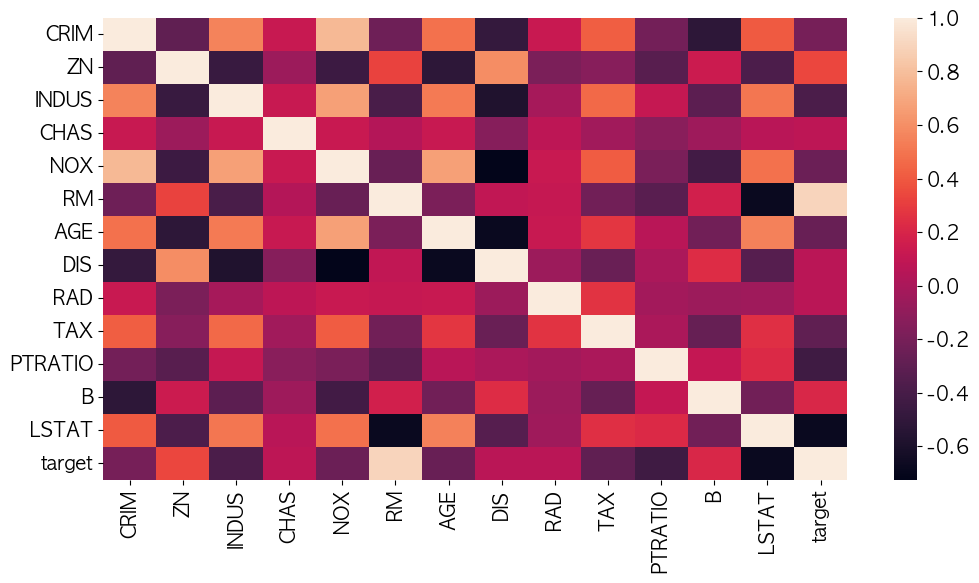

In [16]:
# 피어슨 상관행렬
a1 = boston_df.corr()
sns.heatmap(a1)
plt.show()

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
# 다중 공선성 : 컬럼간에 상관관계가 있는 것을 의미한다.
# VIF : 다중 공선성을 정량화된 수치로 계산한 것
# 2보다 작으면 다중 공선성이 매우 낮은 편이고 10이상이면 매우 높은 편으로 평가된다.

# pip install statsmodels
# y를 설명하기 위한 x 들은 y와의 피어슨 상관계수가 0보다 먼 값을 가진 컬럼을 선택한다.
# 그 이후에 y와 관계가 있는 x 들을 통해 VIF를 측정하여 높은 것 부터 하나씩 제거해 본다.

# VIF가 2보다 작은 것들만 남을 때까지 하니씩 제거해본다.
# 만약 컬럼의 수가 너무 많이 줄어들어서 분석할 거리가 너무 적다고 느껴진다면 10보다 작은 것들을 선택하는 것도
# 좋은 방법 중에 하나이다.
boston_df = pd.read_csv('data/boston.csv')
boston_df.drop(['RM', 'B', 'NOX', 'PTRATIO', 'TAX', 'AGE', 'DIS', 'INDUS', 'LSTAT'], axis=1, inplace=True)

vif = pd.DataFrame()

df100 = boston_df.drop('target', axis=1)

vif['features'] = df100.columns
vif['VIF Factor'] = [variance_inflation_factor(df100.values, i) for i in range(df100.shape[1])]
vif.sort_values('VIF Factor', ascending=False, inplace=True)
vif.reset_index(drop=True, inplace=True)

vif

,features,VIF Factor
0,RAD,1.888616
1,CRIM,1.524658
2,ZN,1.289320
3,CHAS,1.109174


### 04 교차 분석 표

In [20]:
# sunlight : 빛을 받았는가..
# disease : 병이 있는가..
disease = pd.read_csv('data/3-5-2-cross.csv')
disease

,sunlight,disease
0,yes,yes
1,yes,yes
2,yes,yes
3,yes,no
4,yes,no
5,yes,no
6,yes,no
7,yes,no
8,yes,no
9,yes,no


In [21]:
# pandas의 함수를 이용해 교차 분석표를 구한다.
cross_1 = pd.crosstab(
    disease['sunlight'],
    disease['disease']
)
cross_1

disease,no,yes
sunlight,,
no,2,8
yes,7,3


In [22]:
# 만약 컬럼이 굉장히 많으면...
shoes = pd.read_csv('data/3-5-3-cross2_korean.csv')
shoes

,store,color,sales
0,seoul,blue,10
1,seoul,red,15
2,busan,blue,13
3,busan,red,9


In [23]:
cross_2 = pd.pivot_table(
    data=shoes,
    # 통계값을 구하기 위해 사용할 컬럼
    values = 'sales',
    # 구할 통계값(통계함수의 이름을 문자열로 넣어주세요)
    aggfunc='sum',
    # 행 기준
    index='store',
    # 열 기준
    columns='color'
)
cross_2

color,blue,red
store,,
busan,13,9
seoul,10,15
